In [4]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
tf.set_random_seed(0)

In [5]:
## customized implementation for the Variational Autoencoder
from python.vae import VAE
## customized implementation for producing the manifold pictures
from python.custom_plot import comparison_plot, latent_space_plot, manifold_plot, two_d_manifold_plot

# MNIST

Please create a folder called data under the notebook directory before starting.

In [3]:
# Load MNIST data in a format suited for tensorflow.
# The script input_data is available under this URL:
# https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/tutorials/mnist/input_data.py
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/mnist', one_hot=True)
n_samples = mnist.train.num_examples

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


## MNIST Sample Data

In [4]:
## Pick out a sample dataset to test later
mnist_sample = mnist.test.next_batch(100)[0]

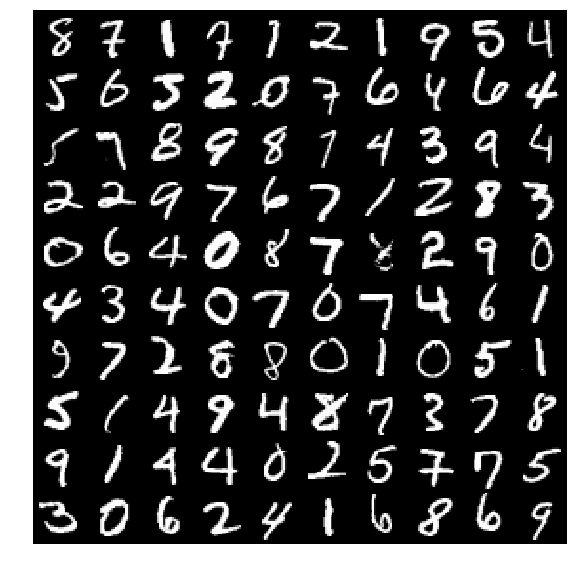

In [5]:
## Show all the sample images in a manifold
manifold_plot(None, mnist_sample, color=plt.cm.gray, fig_size=(8, 8), reconstruct=False, 
             check_point='pic/sample_manifold_mnist.png')

## Try Different Latent Space

### 2-D Latent Space

The following specifies the neural network architectures for both encoder and decoder. In an encoder architecture, we need to provide the following information:

* input_size: the size of the input image. If the input image is in a flat array, write row dimensions time column dimensions (i.e. 28*28). If the input image is not flat, write as a list of row dimensions, column dimensions and channels (i.e. [32, 32, 3])
* layers: a list of dictionary of the layer informations. If the input is flat, you should start with a fully connected layer. If it is not, please start with a convolutional layer. Now, we can discuss the dictionary of the layer information.
    + layer_name: the name of the layer. Please do not use the same layer name as the code is built based on different scopes for different neural network layers. 
    + layer_type: the type of neural network layers, full_conn (fully connected layer) and conv (convolutional layer)
    + hidden_units: number of hidden units. If a fully connected layer is used, one should specify this
    + filter: filter used for convolutional layer (e.g. [5, 5, 3] for input_size [32, 32, 3])
    + num_activation_map: number of activation map used in the convolutional layer
    + activation_function: this specify the activation function used in current layer
In addition, the last layer has to be a fully connected layer as it is the latent variable layer. 
    
For an decoder architecture, it is similar to the encoder but we do not need to specify the input_size as we assume the last layer hidden unit size is the input size. The decoder is a dictionary of list of layers in this case and all the layer has to be fully connected. Refer to the specification in the encoder architecture.

In [6]:
encode_nk_arch = {'input_size': 28*28,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh},
                             ## this the latent space layer
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                             'hidden_units': 2, 
                             'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

Setting up the variational autoencoder. All the others are the same so we will discuss its setup here.
 - Encode_nk_arch specifies the encoder architecture as specified above. 
 - Decode_nk_arch specifies the decoder architecture, again same as specified above.
 - Decoder type specifies the type of distribution used in the decoder. We have two types of distributions: ```bern``` standing for Bernoulli and ```norm``` standing for normal Gaussian distribution.
 - Epochs specifies the number of episodes. Default is 10 but in this example we make it 50. 


In [7]:
## set up the variational autoencoder. All the others are the same so we will only dicuss the setup here.
## decoder_type specifies the type of distribution used in the decoder. We have two types: bern (Bernoulli) and norm (Gaussian)
## one can specify the number of epochs. The default is 10. Here we makes it 50
vae = VAE(encode_nk_arch, decode_nk_arch, decoder_type='bern', epochs=50)

We try to reduce the number of redundant computations. Therefore if a model is trained, we will load it from the model file, otherwise the variational autoencoder will train it and save it in a specified directory of the local drive. 

In [8]:
## If a model is trained, then it will be loaded from a model file
## if not, the vae will get trained and save the model in a specified local drive
trained=True
if trained:
    vae.load("model/vae_2d_mnist_model1")
else:
    vae.train(mnist.train, n_samples)
    vae.save("model/vae_2d_mnist_model1")

INFO:tensorflow:Restoring parameters from model/vae_2d_mnist_model1


Here we generate the manifold of the sample, based on the generative decoder.

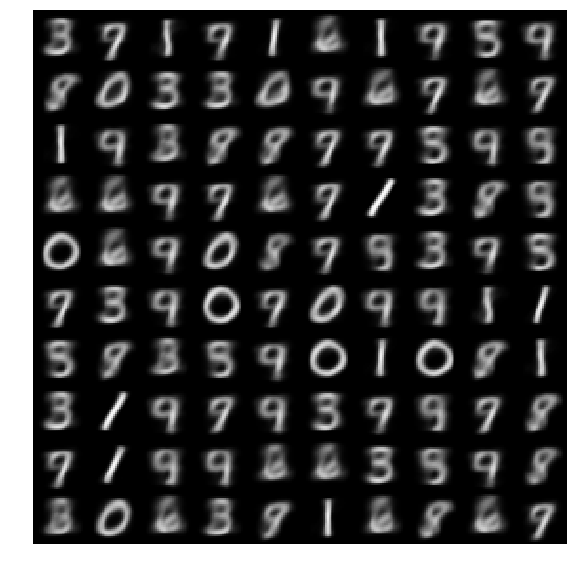

In [9]:
## generate the manifold of the sample based on the generative decoder
manifold_plot(vae, mnist_sample, color=plt.cm.gray, fig_size=(8, 8),
             check_point='pic/2D_latent_reconstructed_manifold_mnist_bern.png')

We can see the generated manifold from the decoder resembles the original one. The manifold appears to be a bit blurry but almost all of the numbers can be correctly identified.

Now let's draw the learned manifold from the model:
- init_lower sets the lowest value for x and y axes
- init_upper sets the higest value for x and y axes
- fig_size specifies the size of the grid, the default size is 20x20
- color specifies the color of the grid, in this case we specified 'gray'
- check_point saves the generated manifold to the specified location in hard drive, otherwise to a local drive

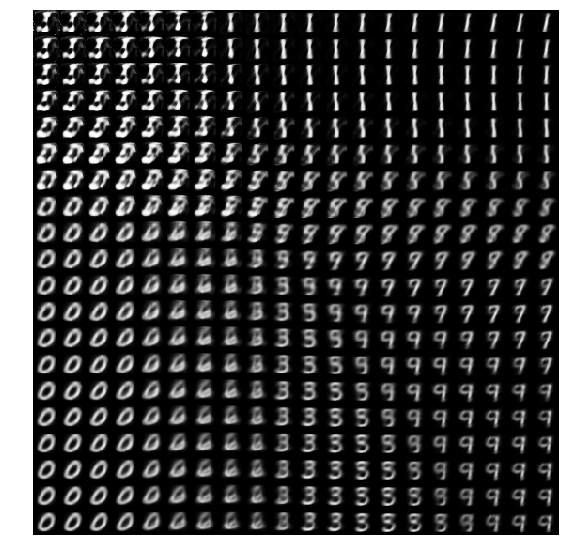

In [10]:
## draw the learned manifold from the model
## init_lower sets the lowest value for x and y axes
## init_upper sets the highest value for x and y axes
## the default size of the grid is 20x20
## you can specify color through color. here we are using 'gray'
## check_point: if this is not None, the produced image will be saved to a local drive.
two_d_manifold_plot(vae, init_lower=-1, init_upper=1, 
                    fig_size=(8, 8), color='gray', 
                    check_point='pic/2D_latent_learned_manifold_mnist_bern.png')

### 5-D Latent Space

In the 5D latent space model, we are using 5 hidden units in the latent layer. We are using the same architecture as the 2D latent space. We expect the manifolds to clear up. 

In [11]:
encode_nk_arch = {'input_size': 28*28,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh},
                             ## this the latent space layer
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                             'hidden_units': 5, 
                             'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [12]:
vae = VAE(encode_nk_arch, decode_nk_arch, decoder_type='bern', epochs=10)

In [13]:
trained=True
if trained:
    vae.load("model/vae_5d_mnist_model1")
else:
    vae.train(mnist.train, n_samples)
    vae.save("model/vae_5d_mnist_model1")

INFO:tensorflow:Restoring parameters from model/vae_5d_mnist_model1


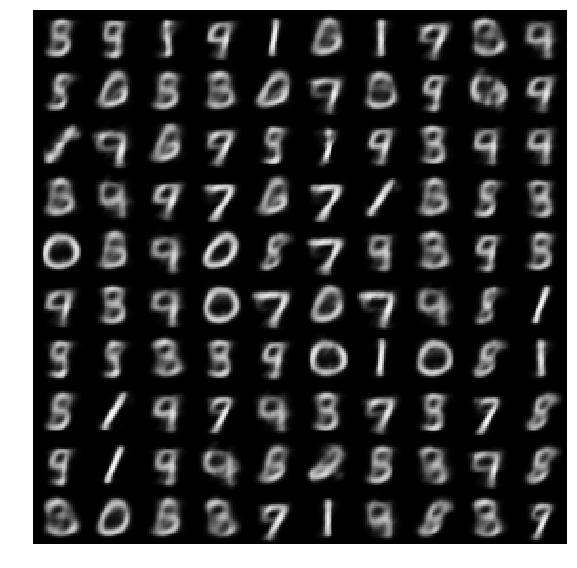

In [14]:
manifold_plot(vae, mnist_sample, color=plt.cm.gray, fig_size=(8, 8),
             check_point='pic/5D_latent_reconstructed_manifold_mnist_bern.png')

Reconstructed manifold is clearer than the 2D case, but still blur.

### 10-D Latent Space

Same architecture as the examples above, with 10 hidden units now in the latent layer. 

In [15]:
encode_nk_arch = {'input_size': 28*28,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh},
                             ## this the latent space layer
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                             'hidden_units': 10, 
                             'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [16]:
vae = VAE(encode_nk_arch, decode_nk_arch, decoder_type='bern', epochs=10)

In [17]:
trained=True
if trained:
    vae.load("model/vae_10d_mnist_model1")
else:
    vae.train(mnist.train, n_samples)
    vae.save("model/vae_10d_mnist_model1")

INFO:tensorflow:Restoring parameters from model/vae_10d_mnist_model1


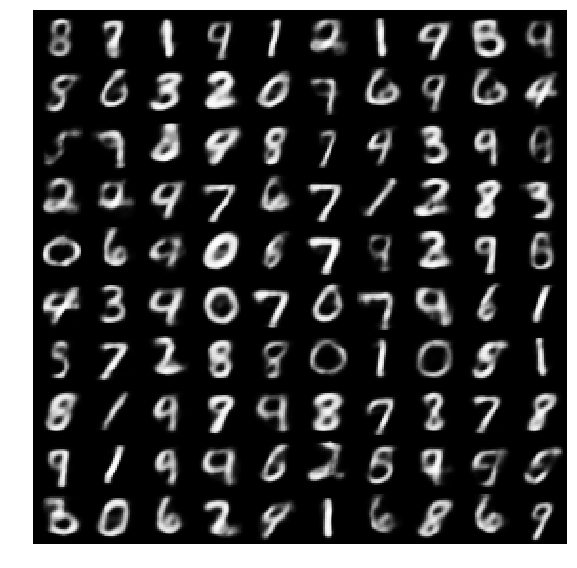

In [18]:
manifold_plot(vae, mnist_sample, color=plt.cm.gray, fig_size=(8, 8),
             check_point='pic/10D_latent_reconstructed_manifold_mnist_bern.png')

We can see that the manifolds are becoming less blur while we increase the latent space. The figure above is indeed clearer than the others above.

### 20-D Latent Space

Last example in the mnist data using bernoulli distribution. This example has 20 hidden units in the latent layer.

In [19]:
encode_nk_arch = {'input_size': 28*28,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh},
                             ## this the latent space layer
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                             'hidden_units': 20, 
                             'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [20]:
vae = VAE(encode_nk_arch, decode_nk_arch, decoder_type='bern', epochs=10)

In [21]:
trained=True
if trained:
    vae.load("model/vae_20d_mnist_model1")
else:
    vae.train(mnist.train, n_samples)
    vae.save("model/vae_20d_mnist_model1")

INFO:tensorflow:Restoring parameters from model/vae_20d_mnist_model1


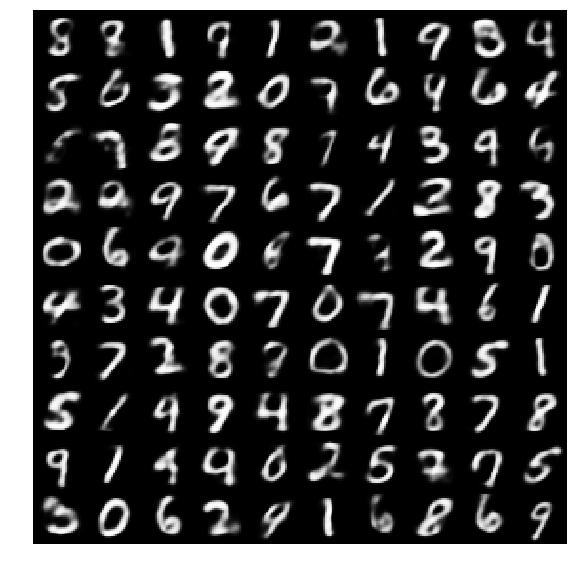

In [22]:
manifold_plot(vae, mnist_sample, color=plt.cm.gray, fig_size=(8, 8),
             check_point='pic/20D_latent_reconstructed_manifold_mnist_bern.png')

We can see that the manifold for the 20D latent space is clearer than the previous, which proves that while we increase the hidden units in the latent space, the numbers can be reconstructed better.

# SVHN

From here onwards, we only care about the StreetVie House numbers database. We import and load the dataset.

In [6]:
from python.svhn import SVHN

In [7]:
## load the svhn image dataset 
svhn = SVHN(db_path="data/svhn")

Loading files
SVHN loaded into memory


## Test Batch Image

In this section, we will get a batch SVHN dataset to test later.

In [8]:
svhn_sample = svhn.next_test_batch(100)
svhn_sample = svhn_sample.reshape([100, -1])

Plot all the svhn data in a manifold.

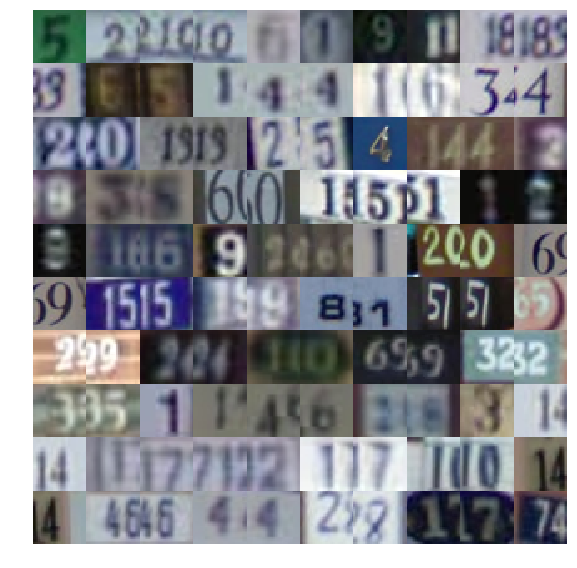

In [9]:
## Plot all the svhn data in a manifold
manifold_plot(None, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              reconstruct=False, check_point='pic/sample_manifold_svhn.png')

## Investigation

### Simple Neural Network Encoder and Decoder

#### 2-D Latent Space

The encode_nk_arch and decode_nk_arch architecture specifications work in the same way as specified in the mnist case above. What we need to make notice here is that since the input image is an RGB image and of different pixel size, the input size is just 32*32*3. This simple neural network uses 5 fully connected layers, with 100 hidden units in each one but only 2 in the latent space layer. We selected 100 hidden units and 5 layers as a compromise between complexity of model and efficiency. Moreover, the activation functions were chosen in a way that improve the reconstructed manifold. Note that we are using 2 hidden units in the latent space. We will slowly increase that number to 5, 50, 100 and 200. In addition, we are using a bernoulli decoder distribution with 20 episodes. 

In [10]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.sigmoid},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.sigmoid},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 2, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [11]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=20, mini_batch_size=100, decoder_type='bern')

In [12]:
trained=True
if trained:
    vae.load("model/vae_2d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_2d_svhn_model_bern_simple")

INFO:tensorflow:Restoring parameters from model/vae_2d_svhn_model_bern_simple


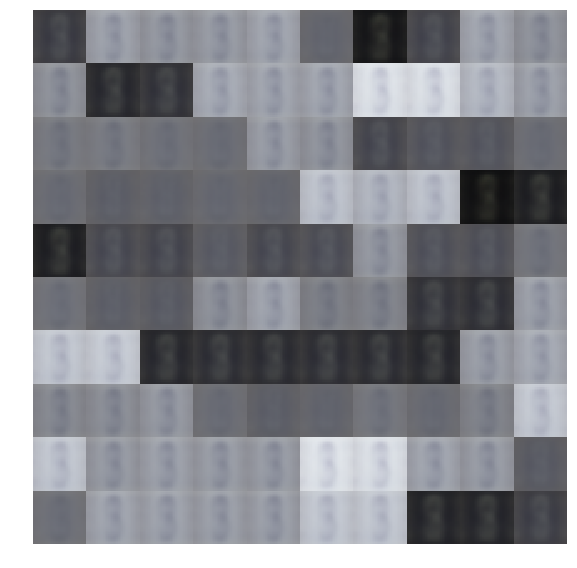

In [13]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/2D_latent_reconstructed_manifold_svhn_bern_simple.png')

This is not a very good reconstructed manifold. The model makes dinstinction on shade and the curviness of the number. Number eight is shown which represents all the possible curves that a single digit number can have.

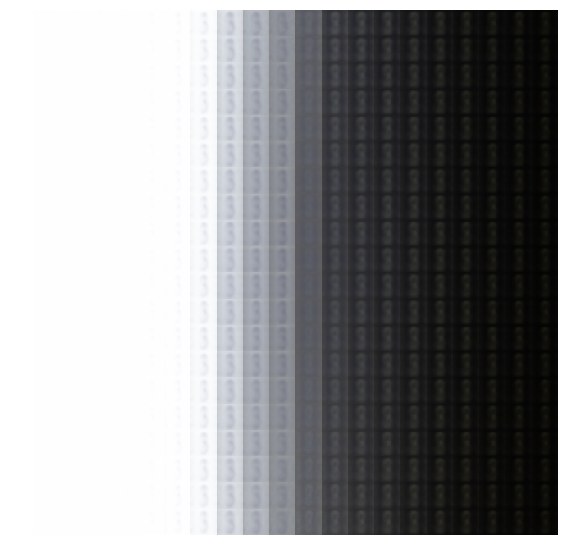

In [14]:
### Show the learned manifold
two_d_manifold_plot(vae, shape=[32, 32, 3], 
                    check_point='pic/2D_latent_learned_manifold_svhn_bern_simple.png')

The learned manifold in the 2D learns two attributes, shades (dark to lighter color) and the curves in the numbers. We can see the different shades as we go from lighter to darker color (left to right). Altough we are using RGB images, the 2D latent space doesn't have space to learn the actual colors but rather their shades. We can also see the number eight being learned.

#### 5-D Latent Space

Use slightly different architecture. Although same 5 layer fully connected neural network with 100 hidden units in each layer, we increased the number of hidden units and changed the activation functions in some layers. Namely, the latent space has now become 5, which allows for more flexibility in the attributes of the images. 

In [33]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 5, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [34]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [35]:
trained=True
if trained:
    vae.load("model/vae_5d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_5d_svhn_model_bern_simple")

INFO:tensorflow:Restoring parameters from model/vae_5d_svhn_model_bern_simple


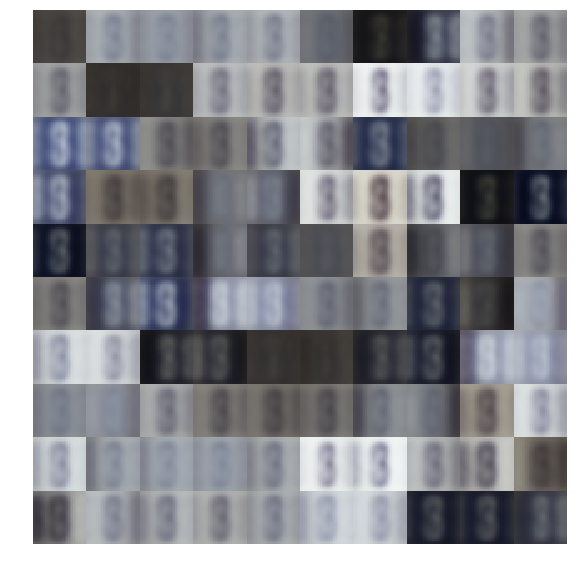

In [36]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/5D_latent_reconstructed_manifold_svhn_bern_simple.png')

The reconstructed manifold learned colours in this example and the number three which is quite similar to number eight. 

#### 20-D Latent Space

Same architecture as above but now we have 20 hidden units in our latent space

In [37]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 20, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [38]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [39]:
trained=True
if trained:
    vae.load("model/vae_20d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_20d_svhn_model_bern_simple")

INFO:tensorflow:Restoring parameters from model/vae_20d_svhn_model_bern_simple


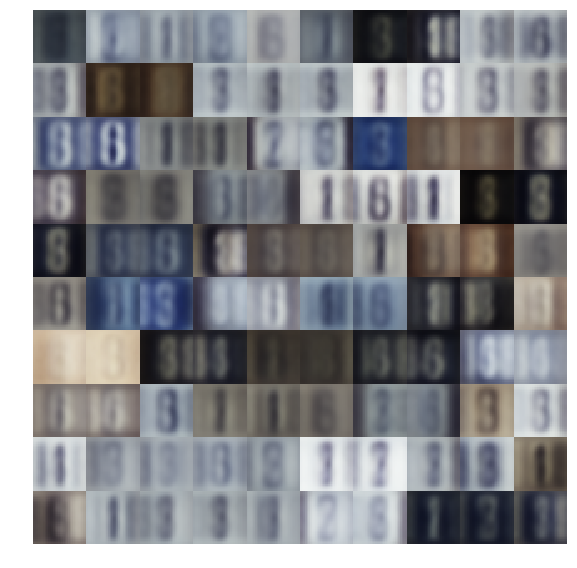

In [40]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/20D_latent_reconstructed_manifold_svhn_bern_simple.png')

We now start to see more numbers and colours to be reconstructed. Manifold is better than the 5D case, but there is plenty of space for improvement. 

#### 50-D Latent Space

In [41]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 50, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [42]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [43]:
trained=True
if trained:
    vae.load("model/vae_50d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_50d_svhn_model_bern_simple")

INFO:tensorflow:Restoring parameters from model/vae_50d_svhn_model_bern_simple


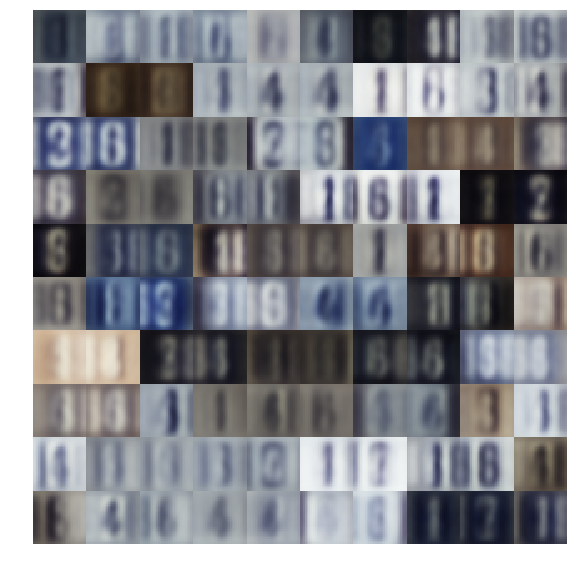

In [44]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/50D_latent_reconstructed_manifold_svhn_bern_simple.png')

We can see an improvement in the performance and hence in the reconstructed manifold. 

#### 100-D Latent Space

As above, same architecture, just increase the hidden units in latent layer to 100. 

In [9]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [10]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [11]:
trained=True
if trained:
    vae.load("model/vae_100d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_100d_svhn_model_bern_simple")

INFO:tensorflow:Restoring parameters from model/vae_100d_svhn_model_bern_simple


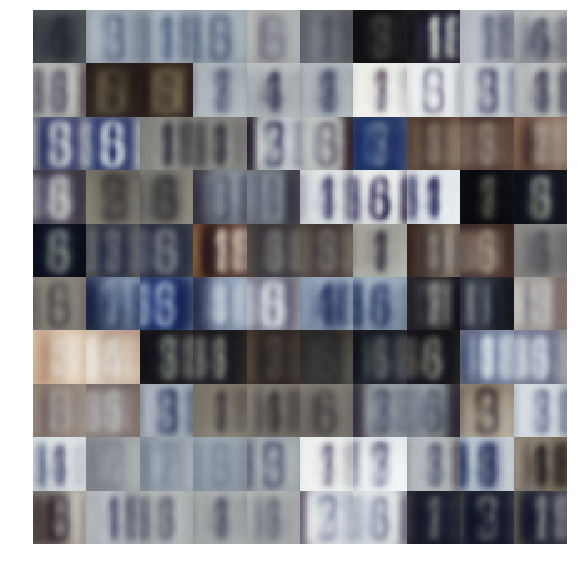

In [12]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/100D_latent_reconstructed_manifold_svhn_bern_simple.png')

Better reconstructed manifold.

#### 200-D Latent Space

Use 200 hidden units in latent layer with same architecture as above. 

In [108]:
encode_nk_arch = {'input_size': 32*32*3,
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 200, 
                              'activation_function': tf.nn.tanh}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [109]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [110]:
trained=True
if trained:
    vae.load("model/vae_200d_svhn_model_bern_simple")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_200d_svhn_model_bern_simple")

Epoch: 0001 cost= 1850.211045651
Epoch: 0006 cost= 1801.042764611


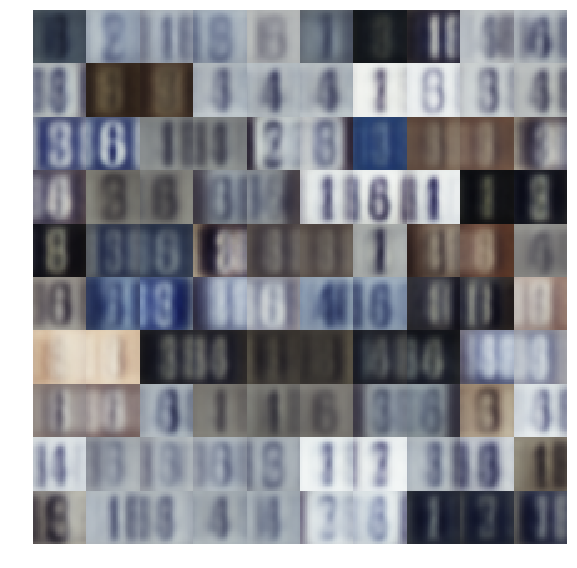

In [111]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/200D_latent_reconstructed_manifold_svhn_bern_simple.png')

Again, as we increase the latent hidden units, the manifold can be reconstructed better

Since SVHN dataset is RGB, we may use convolution layers first. For all the networks we used below, we used one convolution layer with 5x5 filter, $(1, 1, 1, 1)$ striding, 'SAME' padding (to keep the output of the convolution layer the same as the image) and 16 activation maps. 

### Decoder as Bernoulli Distribution

#### 2-D Latent Space

As mentioned just above, the first layer is convolution layer and all the other layers are fully connected layers. The last layer of the encoder is the latent space of our model and we will observe the model performance by keeping the architecture same and increase the hidden units in the latent layer. We start with 2 hidden units. The activation functions were selected in such way to facilitate reasonably good reconstruction results. We use 20 epochs in this model, but it can be seen that after the 6th epoch, the cost function is negligibly improved. Moreover, the decoder is a bernoulli distribution. Later we will follow the same procedure for Gaussian decoder.

In [15]:
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                             {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                             {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 50, 
                              'activation_function': tf.nn.sigmoid},
                            {'layer_name': 'layer_4', 'layer_type': 'full_conn',
                              'hidden_units': 2, 
                              'activation_function': tf.nn.sigmoid}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu}]}

In [16]:
vae = VAE(encode_nk_arch, decode_nk_arch, learn_rate=0.001, epochs=20, mini_batch_size=100, decoder_type='bern')

In [17]:
trained=True
if trained:
    vae.load("model/vae_2d_svhn_model_bern")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_2d_svhn_model_bern")

Epoch: 0001 cost= 2046.317211640
Epoch: 0006 cost= 1963.946914043
Epoch: 0011 cost= 1962.812922715
Epoch: 0016 cost= 1961.365649911


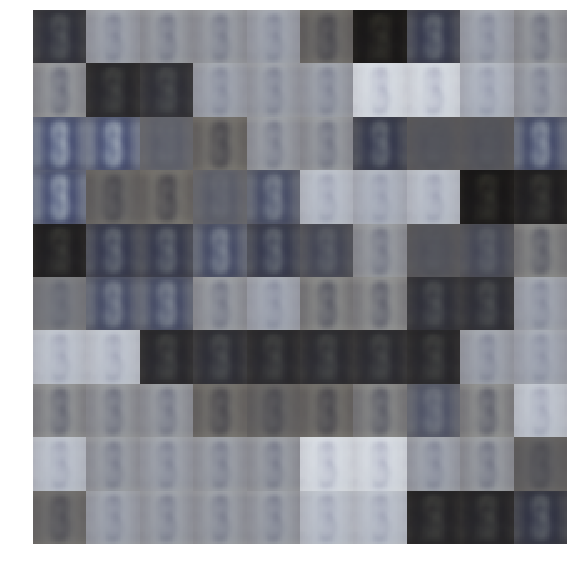

In [18]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/2D_latent_reconstructed_manifold_svhn_bern.png')

The number that be seen is again eight! There are dark shades (black) but there are lighter versions of that too. The results are not satisfactory so we will follow the same architecture for more hidden units in latent space. 

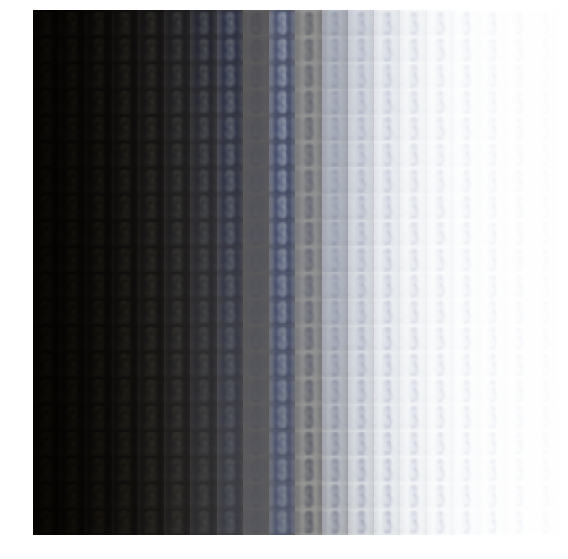

In [19]:
### Show the learned manifold
two_d_manifold_plot(vae, shape=[32, 32, 3], 
                    check_point='pic/2D_latent_learned_manifold_svhn_bern.png')

The digit learned is number eight with shades going from darker on the left to ligher to the right, with some shades of blue learned.

#### 5-D Latent Space

We used a convolution layer as input with the standard parameters as above. However, we used one layer less in this model and increased the number of hidden units in the last encoder layer to 5. Epochs is 10, since the benefit in the cost function doesn't compensate for the extra runtime.

In [60]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 5, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [61]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [62]:
trained=True
if trained:
    vae.load("model/vae_5d_svhn_model_bern")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_5d_svhn_model_bern")

INFO:tensorflow:Restoring parameters from model/vae_5d_svhn_model_bern


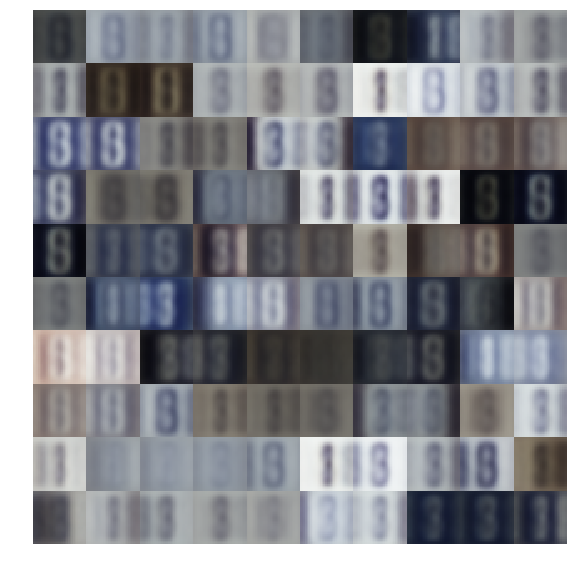

In [63]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/5D_latent_reconstructed_manifold_svhn_bern.png')

More numbers are visible in the 5D case and of course more colors. Besides eight, we can observe number one and three in some cases. 

#### 20-D Latent Space

Convolution layer as input and 20 hidden units in latent space. Decoder is still bernoulli distribution. 

In [64]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 20, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [65]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [66]:
trained=True
if trained:
    vae.load("model/vae_20d_svhn_model_bern")
else:
    vae.train(dataset, 73257, type='svhn')
    vae.save("model/vae_20d_svhn_model_bern")

INFO:tensorflow:Restoring parameters from model/vae_20d_svhn_model_bern


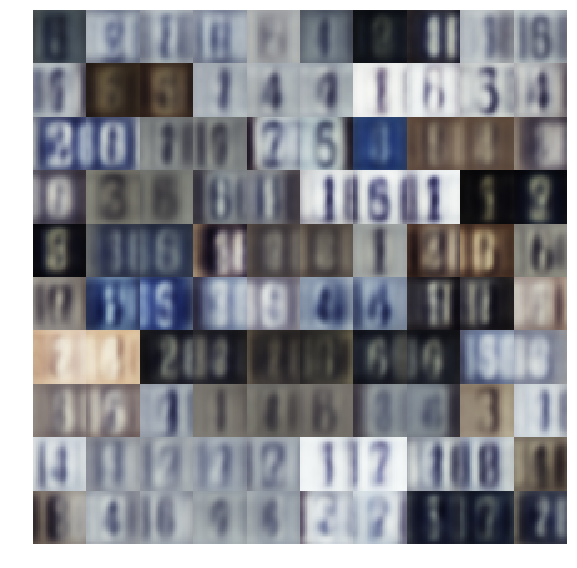

In [67]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/20D_latent_reconstructed_manifold_svhn_bern.png')

The results start to take better shape than the 5D case, but we will see improvement for hidden units more than 20.

#### 50-D Latent Space

Convolution layer as input with 50 hidden units in latent space. 

In [68]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 50, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [69]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [70]:
trained=True
if trained:
    vae.load("model/vae_50d_svhn_model_bern")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_50d_svhn_model_bern")

INFO:tensorflow:Restoring parameters from model/vae_50d_svhn_model_bern


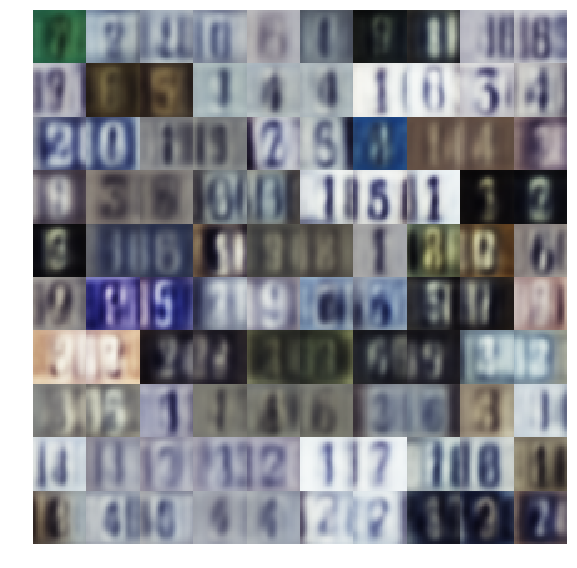

In [71]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/50D_latent_reconstructed_manifold_svhn_bern.png')

The reconstructed manifold is better than the one from the 20D model, with more colors and numbers take better shape.

#### 100-D Latent Space

We go from 50D latent space in the model above to 100 hidden units in latent space layer.

In [72]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [73]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [74]:
trained=True
if trained:
    vae.load("model/vae_100d_svhn_model_bern")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_100d_svhn_model_bern")

INFO:tensorflow:Restoring parameters from model/vae_100d_svhn_model_bern


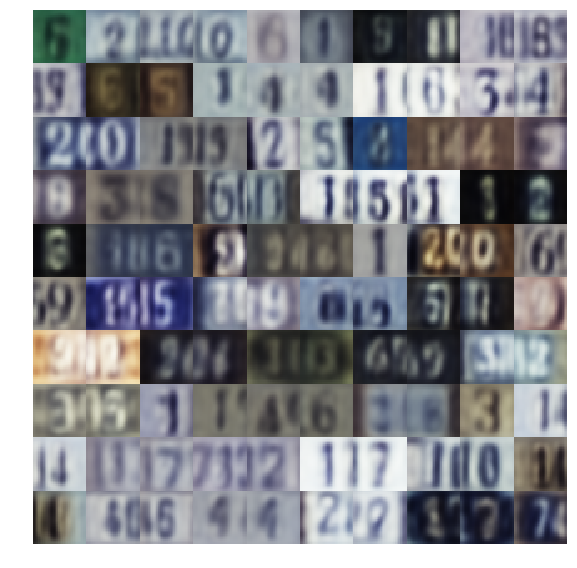

In [75]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/100D_latent_reconstructed_manifold_svhn_bern.png')

The reconstructed manifold looks much more like the sample data manifold. 

#### 200-D Latent Space

In our last example with bernoulli decoder distribution and convolutional neural network, we try to increase the hidden unit number in the latent space layer to 200.

In [76]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 200, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [77]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='bern')

In [78]:
trained=True
if trained:
    vae.load("model/vae_200d_svhn_model_bern")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_200d_svhn_model_bern")

INFO:tensorflow:Restoring parameters from model/vae_200d_svhn_model_bern


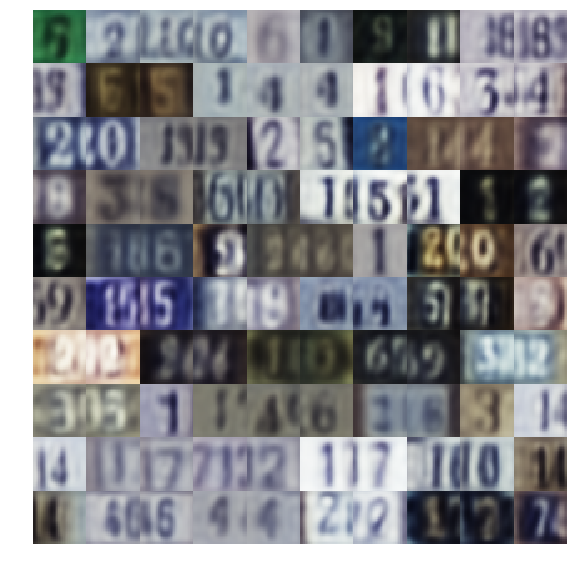

In [79]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/200D_latent_reconstructed_manifold_svhn_bern.png')

Just as the 100D example but better, the reconstructed manifold is almost the same as the sample data.

### Decoder as Gaussian Distribution

#### 2-D Latent Space

In this class of examples, we use gaussian distribution for decoder and convolution layer in the input to work better with the RGB images. To start with, we use 2D as our latent space. 

In [19]:
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 2, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [20]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [21]:
trained=True
if trained:
    vae.load("model/vae_2d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_2d_svhn_model_norm")

INFO:tensorflow:Restoring parameters from model/vae_2d_svhn_model_norm


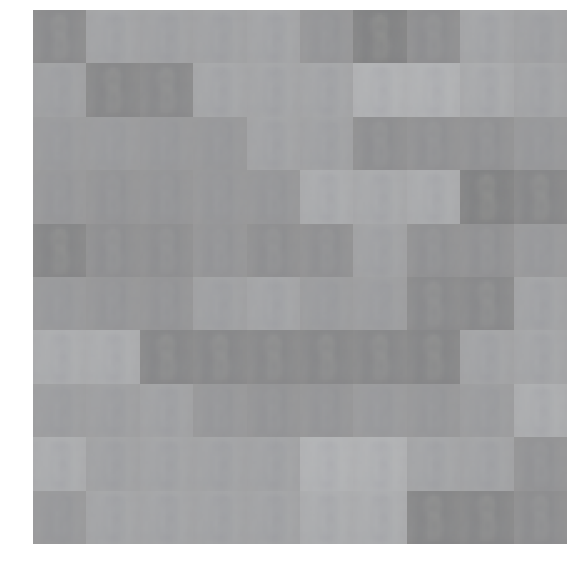

In [22]:
## Check the reconstructed sample manifold
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/2D_latent_reconstructed_manifold_svhn_norm.png')

The reconstructed manifold is just noise. There is no big visual distinction in the shades, with once more, the digit eight hardly being seen.

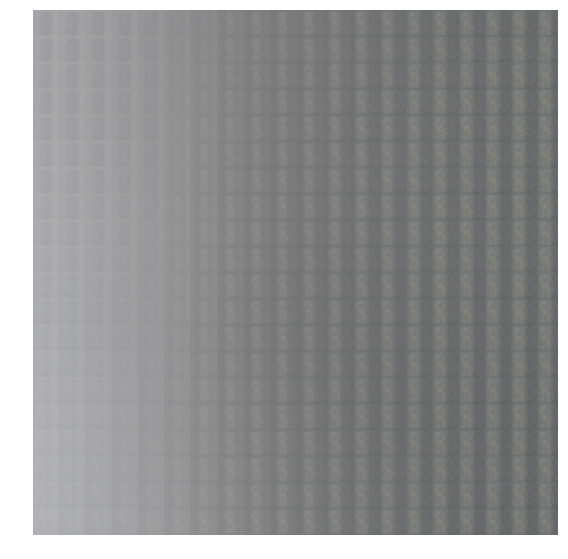

In [23]:
### Show the learned manifold
two_d_manifold_plot(vae, shape=[32, 32, 3], 
                    check_point='pic/2D_latent_learned_manifold_svhn_norm.png')

The shade difference that was apparent in other cases is not present here. In this case, the model learned shades of gray and the digit eight. 

#### 5-D Latent Space

We increase the hidden unit number in the last encoding layer, while keeping the activation functions same, epochs number same and gaussian decoder distribution

In [85]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 5, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [86]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [87]:
trained=True
if trained:
    vae.load("model/vae_5d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_5d_svhn_model_norm")

INFO:tensorflow:Restoring parameters from model/vae_5d_svhn_model_norm


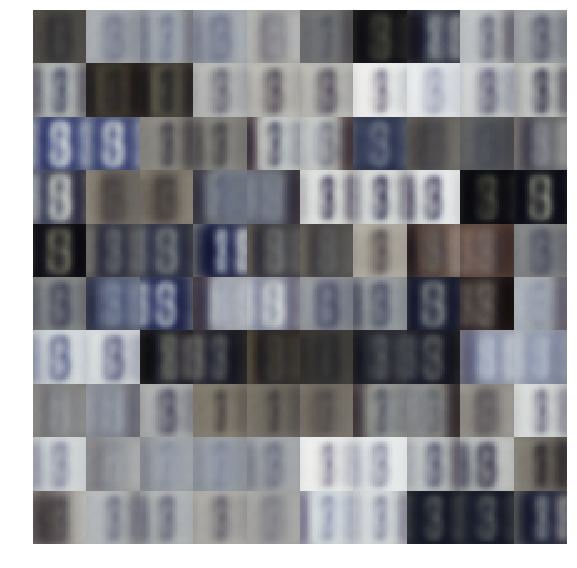

In [88]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/5D_latent_reconstructed_manifold_svhn_norm.png')

Number three and eight can be seen with more colors than the 2D case. There are no any other different digits readable. 

#### 20-D Latent Space

We use the same configuration as above but with 20 latent space units in an attempt to reconstruct more digits more colors.

In [89]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 20, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [90]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [91]:
trained=True
if trained:
    vae.load("model/vae_20d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_20d_svhn_model_norm")

INFO:tensorflow:Restoring parameters from model/vae_20d_svhn_model_norm


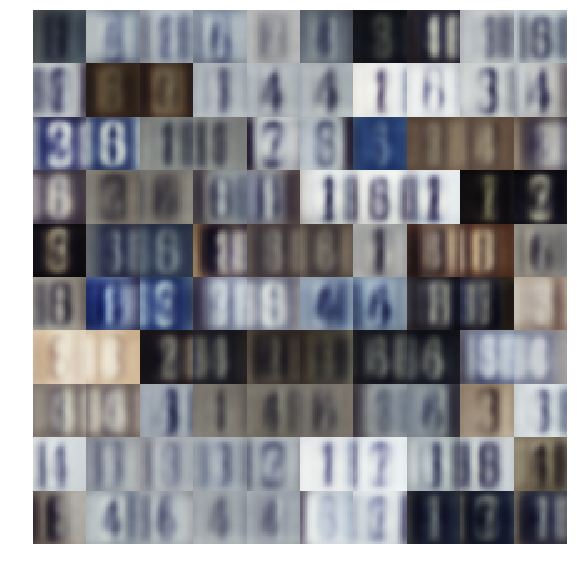

In [92]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/20D_latent_reconstructed_manifold_svhn_norm.png')

Numbers six, two, one, four can be additionally seen in more colors.

#### 50-D Latent Space

Architecture as above, i.e. input layer is the standard convolution layer, decoder is gaussian distribution, layers have same activation function as above but we increase the hidden latent units to 50.

In [112]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 50, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [113]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [114]:
trained=True
if trained:
    vae.load("model/vae_50d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_50d_svhn_model_norm")

Epoch: 0001 cost= 995.014018782
Epoch: 0006 cost= 460.551979843


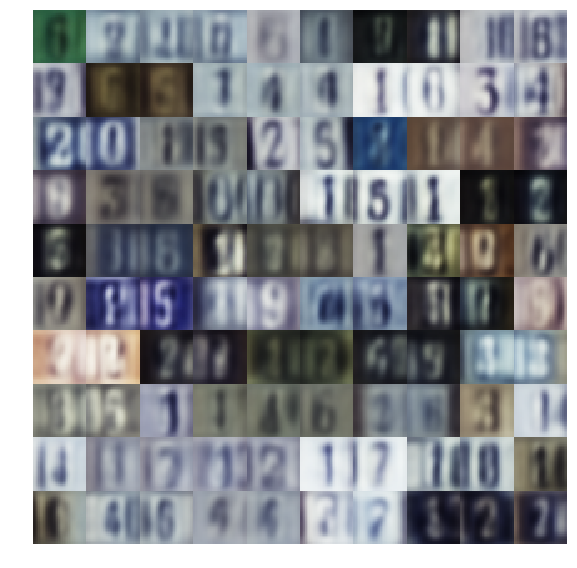

In [115]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/50D_latent_reconstructed_manifold_svhn_norm.png')

All the number can be reconstucted in this example, but the manifold can be improved to look more like the sample data.

#### 100-D Latent Space

Model as above with 100 hidden units in latent space.

In [100]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [101]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [102]:
trained=True
if trained:
    vae.load("model/vae_100d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_100d_svhn_model_norm")

INFO:tensorflow:Restoring parameters from model/vae_100d_svhn_model_norm


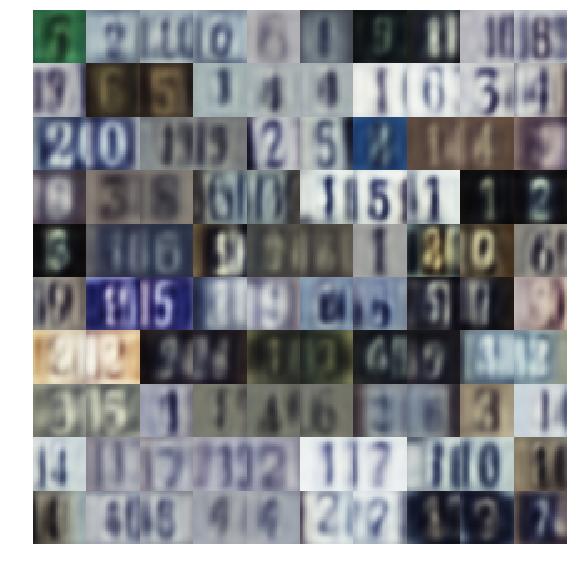

In [103]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/100D_latent_reconstructed_manifold_svhn_norm.png')

Manifold resembles the sample data manifold better than the four afforementioned modesls.

#### 200-D Latent Space

In this final model we exploit the possibility of having 200 hidden units in the latent space layer.

In [116]:
## use convolution layer
encode_nk_arch = {'input_size': [32, 32, 3],
                  'layers': [{'layer_name': 'layer_1', 'layer_type': 'conv',
                              'num_activation_map': 16, 
                              'filter': [5, 5, 3],
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_3', 'layer_type': 'full_conn',
                              'hidden_units': 200, 
                              'activation_function': tf.nn.softplus}]}
decode_nk_arch = {'layers': [{'layer_name': 'layer_1', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.relu},
                            {'layer_name': 'layer_2', 'layer_type': 'full_conn',
                              'hidden_units': 100, 
                              'activation_function': tf.nn.tanh}]}

In [117]:
vae = VAE(encode_nk_arch, decode_nk_arch, epochs=10, mini_batch_size=100, decoder_type='norm')

In [118]:
trained=True
if trained:
    vae.load("model/vae_200d_svhn_model_norm")
else:
    vae.train(svhn, 73257, type='svhn')
    vae.save("model/vae_200d_svhn_model_norm")

Epoch: 0001 cost= 924.574848399
Epoch: 0006 cost= 318.150289056


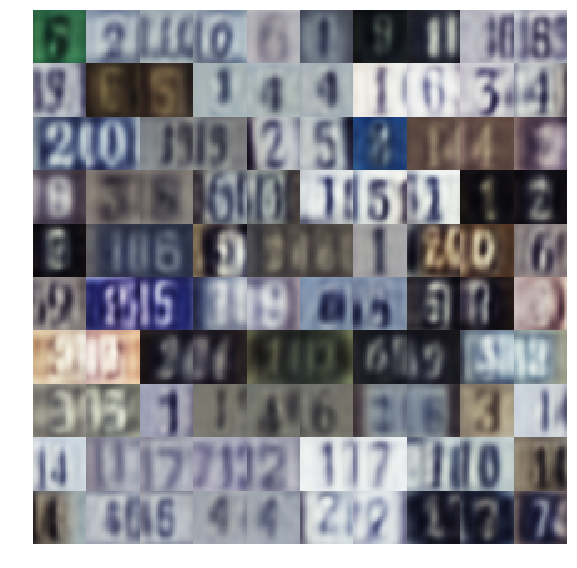

In [119]:
manifold_plot(vae, svhn_sample, shape=(32, 32, 3), 
              fig_size=(8, 8), size=100, 
              check_point='pic/200D_latent_reconstructed_manifold_svhn_norm.png')

Arguably, the resemblance of this manidold with the sample data is better than the resemblance of other models (fewer latent space) with the sample.